# Classification Model - Contraceptive Methods

####**Data Set Information:**

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

The data can be accessed at: <https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice>

####**Attribute Information:**

1. Wife's age (numerical)
2. Wife's education (categorical): 1=low, 2, 3, 4=high
3. Husband's education (categorical): 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary): 0=Non-Islam, 1=Islam
6. Wife's now working? (binary): 0=Yes, 1=No
7. Husband's occupation (categorical): 1, 2, 3, 4
8. Standard-of-living index (categorical): 1=low, 2, 3, 4=high
9. Media exposure (binary): 0=Good, 1=Not good
10. Contraceptive method used (class attribute): 1=No-use, 2=Long-term, 3=Short-term

## Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns; sns.set_theme(style = 'darkgrid')

from collections import Counter

## Import dataset

In [11]:
dataset = pd.read_csv('dataset.csv')

## Exploratory analysis

In [12]:
dataset.columns

Index(['age_wife', 'education_wife', 'education_husband',
       'number_of_children_ever_born', 'religion_wife', 'work_wife',
       'occupation_husband', 'standard_of_living', 'media_exposure',
       'contraceptive_method'],
      dtype='object')

In [13]:
dataset.head()

,age_wife,education_wife,education_husband,number_of_children_ever_born,religion_wife,work_wife,occupation_husband,standard_of_living,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [14]:
dataset.describe()

,age_wife,education_wife,education_husband,number_of_children_ever_born,religion_wife,work_wife,occupation_husband,standard_of_living,media_exposure,contraceptive_method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age_wife                      1473 non-null   int64
 1   education_wife                1473 non-null   int64
 2   education_husband             1473 non-null   int64
 3   number_of_children_ever_born  1473 non-null   int64
 4   religion_wife                 1473 non-null   int64
 5   work_wife                     1473 non-null   int64
 6   occupation_husband            1473 non-null   int64
 7   standard_of_living            1473 non-null   int64
 8   media_exposure                1473 non-null   int64
 9   contraceptive_method          1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [16]:
dataset.isnull().sum()

age_wife                        0
education_wife                  0
education_husband               0
number_of_children_ever_born    0
religion_wife                   0
work_wife                       0
occupation_husband              0
standard_of_living              0
media_exposure                  0
contraceptive_method            0
dtype: int64

In [17]:
corr_matrix = dataset.corr()
corr_matrix['contraceptive_method'].sort_values(ascending=False)

contraceptive_method            1.000000
education_wife                  0.149777
education_husband               0.103226
standard_of_living              0.091149
number_of_children_ever_born    0.082772
work_wife                       0.054438
occupation_husband              0.018161
religion_wife                  -0.025271
media_exposure                 -0.119206
age_wife                       -0.162953
Name: contraceptive_method, dtype: float64

No strong relationship with contraceptive methods detected

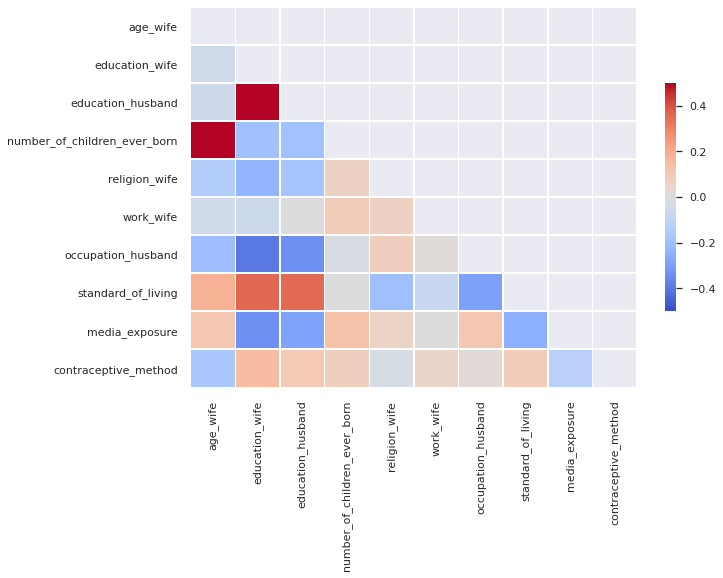

In [18]:
dt_corr = dataset.corr()
dt_mask = np.zeros_like(dt_corr, dtype=np.bool)
dt_mask[np.triu_indices_from(dt_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(dt_corr, mask=dt_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

Strong proportional relationship between the education of the wife and the husband and between the number of children born and the age of the wife.

We can also observe that there is a strong inversely proportional relationship between the husband's occupation and the wife's level of education

In [19]:
counts, bins = np.histogram(dataset['age_wife'], bins=range(15, 50, 2))
bins = 0.5 * (bins[:-1] + bins[1:])

fig1 = px.bar(x=bins, y=counts, labels={'x':'Age (Wife)', 'y':'Number of People'}, text=counts, color_discrete_sequence=px.colors.qualitative.Dark2)
fig1.update_layout(font_size=15)
fig1.show()

### Wife's work situation

In [20]:
fig9 = px.pie(values=dataset['work_wife'].value_counts(), names=['No', 'Yes'], color_discrete_sequence=px.colors.qualitative.Dark2)
fig9.update_traces(textposition='inside', textinfo='percent+label')
fig9.update_layout(
    title_text="Working (Wife)",
    title_font_size=20,
    font_size=15)
fig9.show()

In [21]:
num_children = dataset.groupby('work_wife').mean()['number_of_children_ever_born']

fig = px.bar(x=num_children, y=['Yes', 'No'], text=round(num_children, 2), orientation='h')
fig.update_traces(marker_color=px.colors.qualitative.Dark2[:4])
fig.update_layout(
    title_font_size=20,
    font_size=15,
    xaxis_title='Average of Children Ever Born',
    yaxis_title='Working (Wife)')
fig.show()

In [22]:
l_contrac_method = ['No Use', 'Long Term', 'Short Term']

work_contrac_method = dataset[['contraceptive_method', 'work_wife', 
                               'age_wife']].groupby(['contraceptive_method', 'work_wife']).count()

fig7 = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig7.add_trace(
    go.Pie(labels=l_contrac_method, values=work_contrac_method.query('work_wife == 0').iloc[:, 0]),
    row=1, col=1
)

fig7.add_trace(
    go.Pie(labels=l_contrac_method, values=work_contrac_method.query('work_wife == 1').iloc[:, 0]),
    row=1, col=2
)

fig7.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig7.update_layout(
    title_text="Work (wife) and contraceptive method used",
    title_font_size=20, 
    font_size=15,
    colorway=px.colors.qualitative.Dark2,
    annotations=[dict(text='Work', x=0.195, y=0.5, font_size=22, showarrow=False),
                 dict(text='No Work', x=0.82, y=0.5, font_size=22, showarrow=False)]
    )
fig7.show()

A considerable part of the pregnant women did not use contraceptive methods, this percentage being higher among those who work. We can also see that there is a preference for short-term methods

### Wife's religion

In [23]:
fig3 = px.pie(values=dataset['religion_wife'].value_counts(), names=['Islam', 'Non Islam'], color_discrete_sequence=px.colors.qualitative.Dark2)
fig3.update_traces(textposition='inside', textinfo='percent+label')
fig3.update_layout(
    title_text="Religion (Wife)",
    title_font_size=20,
    font_size=15)
fig3.show()

In [24]:
rel_contrac_method = dataset[['contraceptive_method', 'religion_wife', 
                               'age_wife']].groupby(['contraceptive_method', 'religion_wife']).count()

fig7 = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig7.add_trace(
    go.Pie(labels=l_contrac_method, values=rel_contrac_method.query('religion_wife == 0').iloc[:, 0]),
    row=1, col=1
)

fig7.add_trace(
    go.Pie(labels=l_contrac_method, values=rel_contrac_method.query('religion_wife == 1').iloc[:, 0]),
    row=1, col=2
)

fig7.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig7.update_layout(
    title_text="Religion (wife) and contraceptive method used",
    title_font_size=20, 
    font_size=15,
    colorway=px.colors.qualitative.Dark2,
    annotations=[dict(text='No Islam', x=0.18, y=0.5, font_size=22, showarrow=False),
                 dict(text='Islam', x=0.805, y=0.5, font_size=22, showarrow=False)]
    )
fig7.show()

A significant part of Islamic pregnant women did not use contraceptive methods and, when they did, they chose short-term methods.

As for non-Islamic pregnant women, we observed a homogeneous distribution among the different types of contraceptive methods

### Education Level

In [25]:
levels = [1, 2, 3, 4]
measure = ['High', 'Medium High', 'Medium Low', 'Low']

num_educ_wife = dataset[['education_wife', 'age_wife']].groupby('education_wife').count()['age_wife']
num_educ_husband = dataset[['education_husband', 'age_wife']].groupby('education_husband').count()['age_wife']

fig2 = go.Figure(data=[
    go.Bar(name='Wife', x=levels, y=num_educ_wife, text=num_educ_wife, textposition='auto'),
    go.Bar(name='Husband', x=levels, y=num_educ_husband, text=num_educ_husband, textposition='auto')
])

fig2.update_xaxes(
    ticktext=measure[::-1],
    tickvals=levels,
)
fig2.update_layout(
    barmode='group', 
    colorway=px.colors.qualitative.Dark2, 
    title_font_size=20, 
    font_size=15,
    xaxis_title='Education Level',
    yaxis_title='Number of People')

fig2.show()

In [26]:
wife_avg_children = dataset.groupby('education_wife').mean()['number_of_children_ever_born']
husband_avg_children = dataset.groupby('education_husband').mean()['number_of_children_ever_born']

fig4 = go.Figure(data=[
    go.Bar(name='Wife', x=levels, y=wife_avg_children, text=round(wife_avg_children, 2), textposition='auto'),
    go.Bar(name='Husband', x=levels, y=husband_avg_children, text=round(husband_avg_children, 2), textposition='auto')
])

fig4.update_xaxes(
    ticktext=measure[::-1],
    tickvals=levels,
)

fig4.update_layout(
    barmode='group', 
    colorway=px.colors.qualitative.Dark2, 
    title_font_size=20, 
    font_size=15,
    xaxis_title='Education Level',
    yaxis_title='Average Number of Children Ever Born')

fig4.show()

In [27]:
educ_contrac_method = dataset[['contraceptive_method', 'education_wife', 
                               'age_wife']].groupby(['contraceptive_method', 'education_wife']).count()

fig5 = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

fig5.add_trace(
    go.Pie(labels=l_contrac_method, values=educ_contrac_method.query('education_wife == 1').iloc[:, 0]),
    row=1, col=1
)

fig5.add_trace(
    go.Pie(labels=l_contrac_method, values=educ_contrac_method.query('education_wife == 2').iloc[:, 0]),
    row=1, col=2
)

fig5.add_trace(
    go.Pie(labels=l_contrac_method, values=educ_contrac_method.query('education_wife == 3').iloc[:, 0]),
    row=1, col=3
)

fig5.add_trace(
    go.Pie(labels=l_contrac_method, values=educ_contrac_method.query('education_wife == 4').iloc[:, 0]),
    row=1, col=4
)

fig5.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig5.update_layout(
    title_text="Level of education (wife) and the contraceptive method used",
    title_font_size=20,
    font_size=15,
    colorway=px.colors.qualitative.Dark2,
    annotations=[dict(text='Low', x=0.09, y=0.5, font_size=14, showarrow=False),
                 dict(text='Medium Low', x=0.37, y=0.5, font_size=14, showarrow=False),
                 dict(text='Medium High', x=0.63, y=0.5, font_size=14, showarrow=False),
                 dict(text='High', x=0.91, y=0.5, font_size=14, showarrow=False)]
    )
fig5.show()

Note that the higher the level of education of the pregnant woman, the greater the chance that she will use some contraceptive method

### Standard of Living

In [28]:

fig9 = px.pie(values=dataset['standard_of_living'].value_counts(), 
              names=measure, color_discrete_sequence=px.colors.qualitative.Dark2)
fig9.update_traces(textposition='inside', textinfo='percent+label')
fig9.update_layout(
    title_text="Santandard of Living",
    title_font_size=20,
    font_size=15)
fig9.show()

In [29]:
std_living_children = pd.DataFrame({'Standard of Living': measure,
                                    'Average of Children Ever Born': dataset.groupby('standard_of_living').mean()['number_of_children_ever_born']})

avg_children = dataset.groupby('standard_of_living').mean()['number_of_children_ever_born']

fig = px.bar(x=levels, y=avg_children, text=round(avg_children, 2)) 
fig.update_traces(marker_color=px.colors.qualitative.Dark2[:4])
fig.update_xaxes(
    ticktext=measure[::-1],
    tickvals=levels,
)
fig.update_layout(
    title_font_size=20,
    font_size=15,
    xaxis_title='Standard of Living',
    yaxis_title='Average of Children Ever Born')
fig.show()

In [30]:
std_living_contrac_method = dataset[['contraceptive_method', 'standard_of_living', 
                                     'age_wife']].groupby(['contraceptive_method', 'standard_of_living']).count()

fig6 = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

fig6.add_trace(
    go.Pie(labels=l_contrac_method, values=std_living_contrac_method.query('standard_of_living == 1').iloc[:, 0]),
    row=1, col=1
)

fig6.add_trace(
    go.Pie(labels=l_contrac_method, values=std_living_contrac_method.query('standard_of_living == 2').iloc[:, 0]),
    row=1, col=2
)

fig6.add_trace(
    go.Pie(labels=l_contrac_method, values=std_living_contrac_method.query('standard_of_living == 3').iloc[:, 0]),
    row=1, col=3
)

fig6.add_trace(
    go.Pie(labels=l_contrac_method, values=std_living_contrac_method.query('standard_of_living == 4').iloc[:, 0]),
    row=1, col=4
)

fig6.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig6.update_layout(
    title_text="Standard of living and the contraceptive method used",
    title_font_size=20,
    font_size=15,
    colorway=px.colors.qualitative.Dark2,
    annotations=[dict(text='Low', x=0.09, y=0.5, font_size=14, showarrow=False),
                 dict(text='Medium Low', x=0.37, y=0.5, font_size=14, showarrow=False),
                 dict(text='Medium High', x=0.63, y=0.5, font_size=14, showarrow=False),
                 dict(text='High', x=0.91, y=0.5, font_size=14, showarrow=False)]
    )
fig6.show()

Similar to education, the higher the standard of living, the greater the chance of using any contraceptive method. Long-term methods follow the same logic

In [31]:
mean_number_children = dataset[['contraceptive_method', 'number_of_children_ever_born']].groupby('contraceptive_method').mean().iloc[:, 0]

fig = px.bar(x=mean_number_children, y=l_contrac_method, text=round(mean_number_children, 2), orientation='h')
fig.update_traces(marker_color=px.colors.qualitative.Dark2[:4])
fig.update_layout(
    title_font_size=20,
    font_size=15,
    xaxis_title='Average of Children Ever Born',
    yaxis_title='Contraceptive Method')
fig.show()

The average number of children born varies little between different contraceptive methods

## Division of the dataset in training and testing

In [32]:
y = dataset.iloc[:, -1].values
X = dataset.iloc[:, :-1].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling of dependent variables

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Training (Support Vector Machine)

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [1 1]
 [2 2]
 [1 3]
 [2 2]
 [2 3]
 [1 1]
 [1 3]
 [3 3]
 [1 2]
 [2 2]
 [3 3]
 [3 3]
 [1 3]
 [2 3]
 [3 2]
 [1 3]
 [1 1]
 [1 1]
 [2 3]
 [1 3]
 [3 3]
 [1 1]
 [1 1]
 [3 3]
 [1 2]
 [3 1]
 [3 3]
 [1 1]
 [3 1]
 [3 1]
 [1 2]
 [2 2]
 [1 1]
 [1 3]
 [1 1]
 [3 3]
 [2 2]
 [3 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [3 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [3 2]
 [3 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 3]
 [3 1]
 [3 3]
 [2 1]
 [3 2]
 [1 1]
 [1 1]
 [1 1]
 [3 1]
 [2 3]
 [1 1]
 [2 1]
 [3 3]
 [1 1]
 [3 1]
 [3 2]
 [1 1]
 [3 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [3 2]
 [1 2]
 [2 2]
 [1 2]
 [3 3]
 [3 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [3 2]
 [3 3]
 [3 1]
 [1 1]
 [3 2]
 [2 1]
 [2 2]
 [1 3]
 [3 2]
 [1 1]
 [3 2]
 [1 1]
 [1 3]
 [1 1]
 [1 1]
 [1 3]
 [2 2]
 [3 1]
 [1 3]
 [1 1]
 [1 1]
 [3 2]
 [1 1]
 [1 1]
 [1 2]
 [3 3]
 [3 3]
 [1 1]
 [1 1]
 [3 3]
 [3 3]
 [2 2]
 [3 3]
 [1 3]
 [3 2]
 [2 3]
 [3 3]
 [2 1]
 [1 1]
 [3 2]
 [1 1]
 [1 2]
 [1 3]
 [3 3]
 [3 1]
 [1 3]
 [1 3]
 [1 1]
 [1 1]
 [1 1]
 [1 3]
 [3 1]

## Performance indicator 

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.75      0.71       137
           2       0.54      0.33      0.41        75
           3       0.44      0.51      0.47        83

    accuracy                           0.58       295
   macro avg       0.55      0.53      0.53       295
weighted avg       0.57      0.58      0.57       295



To increase accuracy more data is needed

## Prediction of a new result
**Input values:**
1. Wife's age: 35
1. Wife's education: 2
1. Husband's education: 1
1. Number of children already born: 4
1. Wife's religion: Islam
1. Wife is working: No
1. Husband's occupation: 1
1. Standard of living index: 2
1. Media exposure: Good

**Prediction:**
1. 1: Does not use contraception

In [38]:
print(classifier.predict([[35, 2, 1, 4, 1, 1, 1, 2, 0]]))

[1]
